In [1]:
import os
# Always resolve paths relative to this script file
tedit_path = os.getcwd()
vital_path = os.path.abspath(os.path.join(tedit_path, "../VITAL"))
print(tedit_path)

#################################
# same data preparation
#################################
dataset_name = 'syn_gt'
tedit_mdl = "te"
with open(os.path.join(tedit_path, 'tedit_runs/prepare_dfs.py')) as f:
    exec(f.read())
    

/sfs/gpfs/tardis/home/jq2uw/llm_nicu_vitalsigns/script/tedit_lite_tx
Random seed set to 333
using device:  cuda
{'No trend.': (210, 60, 30), 'The time series shows upward linear trend.': (210, 60, 30), 'The time series shows downward linear trend.': (210, 60, 30), 'The time series shows upward quadratic trend.': (210, 60, 30), 'The time series shows downward quadratic trend.': (210, 60, 30), 'No seasonal pattern.': (210, 60, 30), 'The time series exhibits a seasonal pattern.': (210, 60, 30), 'No sharp shifts.': (210, 60, 30), 'The mean of the time series shifts upwards.': (210, 60, 30), 'The mean of the time series shifts downwards.': (210, 60, 30), 'The time series exhibits low variability.': (210, 60, 30), 'The time series exhibits high variability.': (210, 60, 30)}


final distribution of text prediction
text
No trend. No seasonal pattern. No sharp shifts. The time series exhibits low variability.                                                                                       

In [ ]:
#################################
# train TEdit model
#################################
resume = True # resume trainig from ckpt
train = True

with open('tedit_runs/train.py', 'r') as file:
    exec(file.read())

# # Filter and prepare source/target dataframes
# df_left_src = df_left[
#     (df_left['segment1'] == 'The time series shows downward linear trend.') & 
#     (df_left['segment2'] == 'No seasonal pattern.') &  
#     (df_left['segment3'] == 'The mean of the time series shifts upwards.') & 
#     (df_left['segment4'] == 'The time series exhibits low variability.')
# ].sample(20, random_state=333)
# test_loader_src, _ = TEditDataset_lite(df_left_src, meta, config_dict).get_loader(batch_size=128, shuffle=False)

# df_left_tgt = df_left_src.copy()
# df_left_tgt['text'] = df_left_tgt['text'].str.replace('The time series shows downward linear trend.', 'The time series shows upward linear trend.')
# df_left_tgt['text'] = 'The time series shows upward linear trend.'
# test_loader_tgt, _ = TEditDataset_lite(df_left_tgt, meta, config_dict).get_loader(batch_size=128, shuffle=False)

# final_loader = get_eval_loader(test_loader_src, test_loader_tgt)
# pred_tw, pred_te, src, tgt = tedit_generate(
#     configs,
#     test_loader=final_loader,
#     n_samples = 10,
#     sampler = "ddim",
#     plot_n=20
# )

Loaded train split – 12600 samples.
Model dimensions - side_dim: 200, attr_dim: 768, n_attrs: 1
Loaded train split – 12600 samples.
Model dimensions - side_dim: 200, attr_dim: 768, n_attrs: 1
Loaded valid split – 3600 samples.
Model dimensions - side_dim: 200, attr_dim: 768, n_attrs: 1
Epoch 9 | Loss 0.3410 | Time 8.52s

*** New best val-loss 0.3369 at epoch 9

Epoch 19 | Loss 0.3056 | Time 8.27s

*** New best val-loss 0.3048 at epoch 19

Epoch 29 | Loss 0.2904 | Time 8.69s

*** New best val-loss 0.2870 at epoch 29

Epoch 39 | Loss 0.2831 | Time 8.47s

*** New best val-loss 0.2757 at epoch 39

Epoch 49 | Loss 0.2772 | Time 8.43s

*** New best val-loss 0.2739 at epoch 49

Epoch 59 | Loss 0.2697 | Time 8.52s

*** New best val-loss 0.2667 at epoch 59

Epoch 69 | Loss 0.2641 | Time 8.34s

*** New best val-loss 0.2595 at epoch 69

Epoch 79 | Loss 0.2572 | Time 8.35s

*** New best val-loss 0.2510 at epoch 79

Epoch 89 | Loss 0.2507 | Time 8.27s

*** New best val-loss 0.2484 at epoch 89

Epoc

In [11]:
#################################
# same eval
#################################
with open(os.path.join(tedit_path, 'tedit_runs/eval.py')) as f:
    exec(f.read())
sum(p.numel() for p in model.parameters())

Loaded test split – 1800 samples.
Model dimensions - side_dim: 200, attr_dim: 768, n_attrs: 1



KeyboardInterrupt



Loaded lite dataset – 20 samples with embedding dimension 768.
Model dimensions - side_dim: 200, attr_dim: 768, n_attrs: 1
Loaded lite dataset – 20 samples with embedding dimension 768.
Model dimensions - side_dim: 200, attr_dim: 768, n_attrs: 1


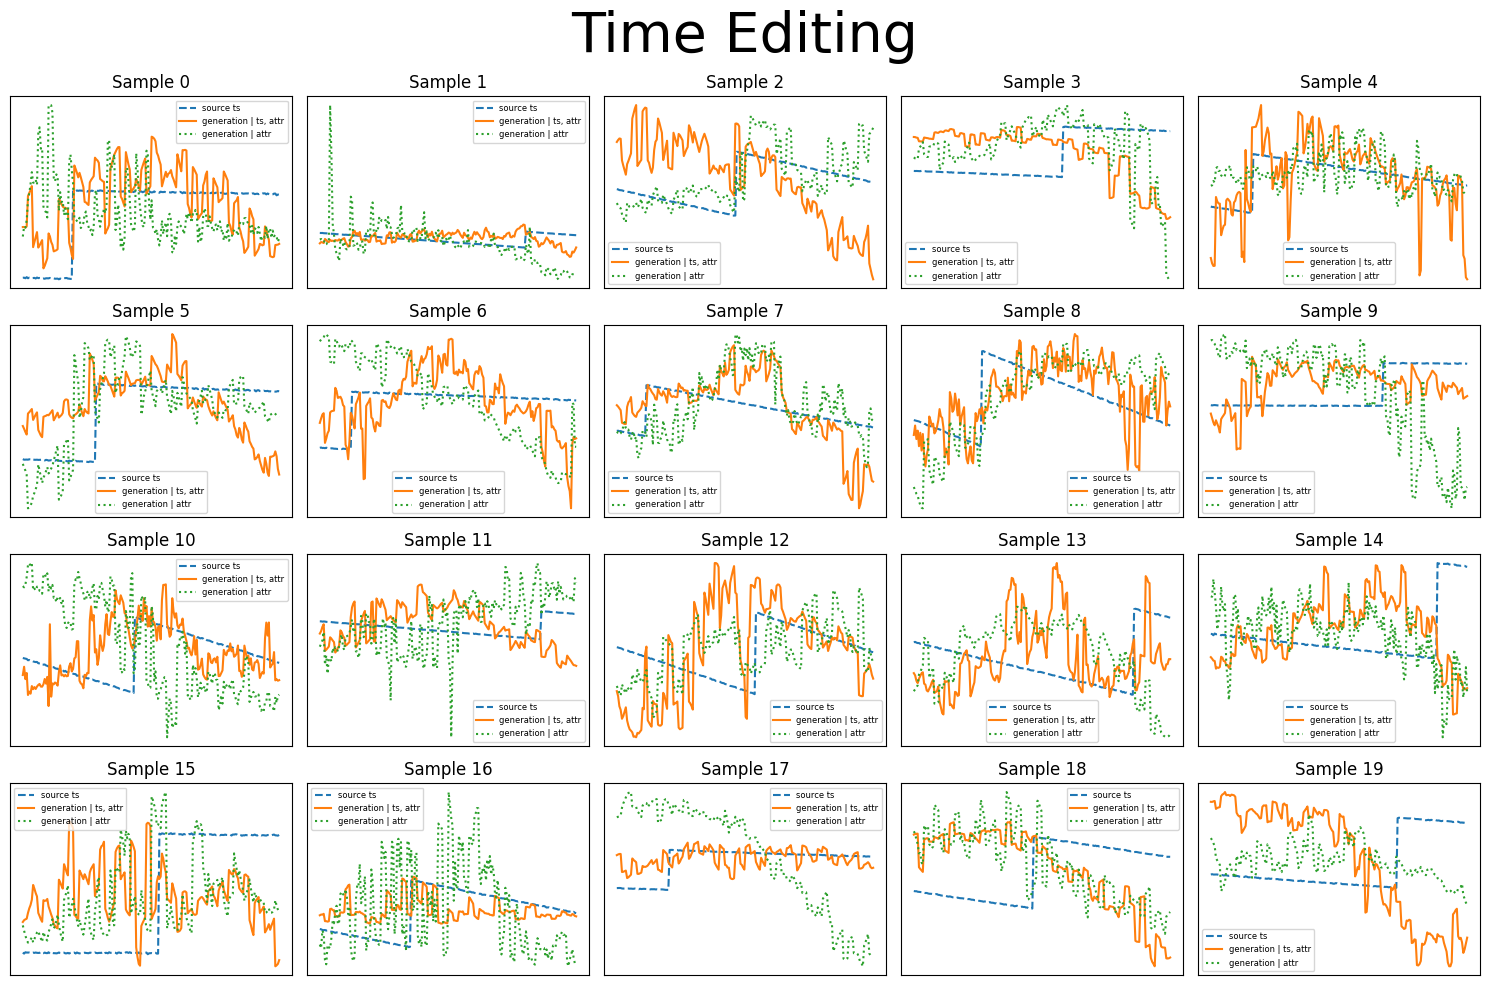

In [10]:

# Filter and prepare source/target dataframes
df_left_src = df_left[
    (df_left['segment1'] == 'The time series shows downward linear trend.') & 
    (df_left['segment2'] == 'No seasonal pattern.') &  
    (df_left['segment3'] == 'The mean of the time series shifts upwards.') & 
    (df_left['segment4'] == 'The time series exhibits low variability.')
].sample(20, random_state=333)
test_loader_src, _ = TEditDataset_lite(df_left_src, meta, config_dict).get_loader(batch_size=128, shuffle=False)

df_left_tgt = df_left_src.copy()
# df_left_tgt['text'] = df_left_tgt['text'].str.replace('The time series shows downward linear trend.', 'The time series shows upward linear trend.')
# df_left_tgt['text'] = 'The time series shows upward linear trend.'
test_loader_tgt, _ = TEditDataset_lite(df_left_tgt, meta, config_dict).get_loader(batch_size=128, shuffle=False)

final_loader = get_eval_loader(test_loader_src, test_loader_tgt)
pred_tw, pred_te, src, tgt = tedit_generate(
    configs,
    test_loader=final_loader,
    n_samples = 1,
    sampler = "ddpm-ddim",
    plot_n=20
)

In [4]:
# args = args_ls[0]
# y_col = "segment2"
# print(y_col)
# df = pd.DataFrame()
# aug_type = 'conditional'
# df_type = eval_ts_similarity(df_eval,
#                             model, 
#                             config_dict, 
#                             w = w,
#                             y_col = y_col,
#                             conditions = args[y_col],
#                             b = 500 if aug_type == 'marginal' else 200, 
#                             aug_type = aug_type, 
#                             meta = meta, configs = configs)  


In [ ]:
# prepare data and labels
metrics = ['mse', 'mae']
types_ = ['marginal', 'conditional']
data = [
    df_pw_dists_all[(df_pw_dists_all.metric == m) & 
                    (df_pw_dists_all.aug_type == t)].score
    for m in metrics for t in types_
]
labels = [f"{m.upper()} ({t})" for m in metrics for t in types_]

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot(data, labels=labels)
ax.set_ylabel('Distance to ground truth')
ax.set_ylim(-1, 20)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
df_stats_condi = eng_math_diff_multiple(df_stats_all, base_aug_dict, aug_type='conditional')# 
df_stats_margi = eng_math_diff_multiple(df_stats_all, base_aug_dict, aug_type='marginal')# 
df_stats_condi['aug_type'] = 'conditional'
df_stats_margi['aug_type'] = 'marginal'
df_stats = pd.concat([df_stats_condi, df_stats_margi], ignore_index=True)

In [ ]:
# Define the base augmentation pairs
df_dists_raw = df_dists_ls[0]
df_dists = pd.DataFrame()
for metric in ['dtw']: # 'mse', 'mae', , 'lcss'
    df = eng_dists_multiple(df_dists_raw, base_aug_dict, metric = metric, aug_type='marginal')
    df_dists = pd.concat([df_dists, df], ignore_index=True)
df_dists_margi = df_dists
print('-'*80)

# Define the base augmentation pairs
df_dists_raw = df_dists_ls[1]
df_dists = pd.DataFrame()
for metric in ['dtw']: # 'mse', 'mae',, 'lcss' 
    df = eng_dists_multiple(df_dists_raw, base_aug_dict, metric = metric, aug_type='conditional')
    df_dists = pd.concat([df_dists, df], ignore_index=True)
df_dists_condi = df_dists
print('-'*80)

df_dists_all = pd.concat([df_dists_margi, df_dists_condi], ignore_index=True)

In [ ]:
df_rats_margi = df_rats_ls[0]
df_rats_margi = df_rats_margi[df_rats_margi['aug_type'] == 'marginal']
df_rats_condi = df_rats_ls[1]
df_rats_condi = df_rats_condi[df_rats_condi['aug_type'] == 'conditional']
df_rats_all = pd.concat([df_rats_margi, df_rats_condi], ignore_index=True)

df_rats_all.dropna(inplace=True)
fig = plot_rats(df_rats_all, figsize=(12, 3))
plt.show()


In [ ]:
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

# 1) Combine & clean
df_all      = pd.concat([df_rats_all, df_dists_all, df_pw_dists_all],
                        ignore_index=True).dropna(subset=['score'])
attr_levels = df_all['attr'].unique().tolist()
metrics     = df_all['metric'].unique().tolist()

# 2) Shared box‐style kwargs
base_kwargs = dict(
    notch=True,
    showmeans=True,
    patch_artist=False,
    boxprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    medianprops=dict(color="red", linewidth=2),
    flierprops=dict(markeredgecolor="black",
                    markerfacecolor="black",
                    marker="o",
                    markersize=3)
)

def draw_subplot(ax, subdf, title):
    width = 0.35
    x     = list(range(len(metrics)))

    # prepare data
    data_m = [subdf[(subdf.metric==m)&(subdf.aug_type=='marginal')]['score']
              for m in metrics]
    data_c = [subdf[(subdf.metric==m)&(subdf.aug_type=='conditional')]['score']
              for m in metrics]

    pos_m = [xi - width/2 for xi in x]
    pos_c = [xi + width/2 for xi in x]

    # marginal (solid)
    ax.boxplot(data_m, positions=pos_m, widths=width, **base_kwargs)

    # conditional (dashed)
    dashed = base_kwargs.copy()
    dashed.update({
        'boxprops':    dict(color="black", linestyle="--"),
        'medianprops': dict(color="red",   linestyle="--", linewidth=2),
        'whiskerprops':dict(color="black", linestyle="--"),
        'capprops':    dict(color="black", linestyle="--"),
    })
    ax.boxplot(data_c, positions=pos_c, widths=width, **dashed)

    # styling
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, rotation=0)
    ax.set_title(title)
    ax.set_ylabel("Score (symlog)")
    ax.set_yscale('symlog', linthresh=1e-2)
    ax.set_ylim(-1e3, 1e3)        # both halves visible

    ax.set_axisbelow(True)
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax.axhline(0, color='gray', linestyle='-', linewidth=1)

# 3) Build a GridSpec with 2 columns
n_attrs  = len(attr_levels)
n_cols   = 2
n_rows   = 1 + math.ceil(n_attrs / n_cols)

fig = plt.figure(figsize=(12, 3*n_rows))
gs  = fig.add_gridspec(n_rows, n_cols, hspace=0.4)

# Top row: merged across both columns
ax0 = fig.add_subplot(gs[0, :])
draw_subplot(ax0, df_all, title="All attributes combined")

# Remaining rows: one attr per cell, left→right top→bottom
for idx, attr in enumerate(attr_levels):
    row = 1 + (idx // n_cols)
    col = idx % n_cols
    ax  = fig.add_subplot(gs[row, col])
    sub = df_all[df_all['attr']==attr]
    draw_subplot(ax, sub, title=f"Attribute = {attr}")

# 4) Legend on the top plot
legend_items = [
    Line2D([0],[0], color='black', lw=2, linestyle='-',  label='Marginal'),
    Line2D([0],[0], color='black', lw=2, linestyle='--', label='Conditional')
]
ax0.legend(handles=legend_items, loc='lower right')

plt.tight_layout()
plt.show()


# Case study

In [ ]:
# #################################
# # train TEdit model
# #################################
# resume = False # resume trainig from ckpt
# train = False

# with open('tedit_runs/train.py', 'r') as file:
#     exec(file.read())

# Filter and prepare source/target dataframes
df_left_src = df_left[
    # (df_left['segment1'] == 'The time series shows downward linear trend.') & 
    (df_left['segment2'] == 'No seasonal pattern.') #&  
    # (df_left['segment3'] == 'The mean of the time series shifts upwards.') & 
    # (df_left['segment4'] == 'The time series exhibits low variability.')
].sample(20, random_state=333)
test_loader_src, _ = TEditDataset_lite(df_left_src, meta, config_dict).get_loader(batch_size=128, shuffle=False)

df_left_tgt = df_left_src.copy()
df_left_tgt['segment2'] = 'The time series exhibits a seasonal pattern.'
test_loader_tgt, _ = TEditDataset_lite(df_left_tgt, meta, config_dict).get_loader(batch_size=128, shuffle=False)

final_loader = get_eval_loader(test_loader_src, test_loader_tgt)
pred_tw, pred_te, src, tgt = tedit_generate(
    configs,
    test_loader=final_loader,
    n_samples = 1,
    sampler = "ddpm-ddim",
    plot_n=20
)

In [ ]:

# Filter and prepare source/target dataframes
df_left_src = df_left[
    (df_left['segment1'] == 'No trend.') #& 
    # (df_left['segment2'] == 'The time series exhibits a seasonal pattern.' ) #&  
    # (df_left['segment3'] == 'The mean of the time series shifts upwards.') & 
    # (df_left['segment4'] == 'The time series exhibits low variability.')
].sample(20, random_state=333)
test_loader_src, _ = TEditDataset_lite(df_left_src, meta, config_dict).get_loader(batch_size=128, shuffle=False)

df_left_tgt = df_left_src.copy()
df_left_tgt['segment1'] = 'The time series shows downward linear trend.'
test_loader_tgt, _ = TEditDataset_lite(df_left_tgt, meta, config_dict).get_loader(batch_size=128, shuffle=False)

final_loader = get_eval_loader(test_loader_src, test_loader_tgt)
pred_tw, pred_te, src, tgt = tedit_generate(
    configs,
    test_loader=final_loader,
    n_samples = 10,
    sampler = "ddpm-ddim",
    plot_n=20
)

In [ ]:

# Filter and prepare source/target dataframes
df_left_src = df_left[
    # (df_left['segment1'] == 'The time series shows downward linear trend.') & 
    (df_left['segment2'] == 'No seasonal pattern.' ) #&  
    # (df_left['segment3'] == 'The mean of the time series shifts upwards.')# & 
    # (df_left['segment4'] == 'The time series exhibits low variability.')
].sample(20, random_state=333)
df_left_src['segment2'] = 'The time series exhibits a seasonal pattern.'
test_loader_src, _ = TEditDataset_lite(df_left_src, meta, config_dict).get_loader(batch_size=128, shuffle=False)

pred_tw, pred_te, src, tgt = tedit_generate(
    configs,
    test_loader=test_loader_src,
    n_samples = 10,
    sampler = "ddpm-ddim",
    plot_n=20
)

In [ ]:

# Filter and prepare source/target dataframes
df_left_src = df_left[
    # (df_left['segment1'] == 'The time series shows downward linear trend.') & 
    # (df_left['segment2'] == 'No seasonal pattern.' ) &  
    (df_left['segment3'] == 'The mean of the time series shifts downwards.')# & 
    # (df_left['segment4'] == 'The time series exhibits low variability.')
].sample(20, random_state=333)
test_loader_src, _ = TEditDataset_lite(df_left_src, meta, config_dict).get_loader(batch_size=128, shuffle=False)

df_left_tgt = df_left_src.copy()
df_left_tgt['segment3'] = 'The mean of the time series shifts upwards.'
test_loader_tgt, _ = TEditDataset_lite(df_left_tgt, meta, config_dict).get_loader(batch_size=128, shuffle=False)

final_loader = get_eval_loader(test_loader_src, test_loader_tgt)
pred_tw, pred_te, src, tgt = tedit_generate(
    configs,
    test_loader=final_loader,
    n_samples = 10,
    sampler = "ddpm-ddim",
    plot_n=20
)

In [ ]:

# Filter and prepare source/target dataframes
df_left_src = df_left[
    # (df_left['segment1'] == 'The time series shows downward linear trend.') & 
    # (df_left['segment2'] == 'No seasonal pattern.' ) &  
    (df_left['segment3'] == 'The mean of the time series shifts upwards.')# & 
    # (df_left['segment4'] == 'The time series exhibits low variability.')
].sample(20, random_state=333)
test_loader_src, _ = TEditDataset_lite(df_left_src, meta, config_dict).get_loader(batch_size=128, shuffle=False)

df_left_tgt = df_left_src.copy()
df_left_tgt['segment3'] = 'The mean of the time series shifts downwards.'
test_loader_tgt, _ = TEditDataset_lite(df_left_tgt, meta, config_dict).get_loader(batch_size=128, shuffle=False)

final_loader = get_eval_loader(test_loader_src, test_loader_tgt)
pred_tw, pred_te, src, tgt = tedit_generate(
    configs,
    test_loader=final_loader,
    n_samples = 10,
    sampler = "ddpm-ddim",
    plot_n=20
)

In [ ]:

# Filter and prepare source/target dataframes
df_left_src = df_left[
    # (df_left['segment1'] == 'The time series shows downward linear trend.') & 
    # (df_left['segment2'] == 'No seasonal pattern.' ) &  
    (df_left['segment3'] == 'The mean of the time series shifts downwards.')# & 
    # (df_left['segment4'] == 'The time series exhibits low variability.')
].sample(20, random_state=333)
test_loader_src, _ = TEditDataset_lite(df_left_src, meta, config_dict).get_loader(batch_size=128, shuffle=False)

df_left_tgt = df_left_src.copy()
df_left_tgt['segment3'] = 'The mean of the time series shifts upwards.'
test_loader_tgt, _ = TEditDataset_lite(df_left_tgt, meta, config_dict).get_loader(batch_size=128, shuffle=False)

final_loader = get_eval_loader(test_loader_src, test_loader_tgt)
pred_tw, pred_te, src, tgt = tedit_generate(
    configs,
    test_loader=final_loader,
    n_samples = 10,
    sampler = "ddim",
    plot_n=20
)

In [ ]:

# Filter and prepare source/target dataframes
df_left_src = df_left[
    # (df_left['segment1'] == 'The time series shows downward linear trend.') & 
    # (df_left['segment2'] == 'The time series exhibits a seasonal pattern.' ) #&  
    # (df_left['segment3'] == 'The mean of the time series shifts upwards.') & 
    (df_left['segment4'] == 'The time series exhibits low variability.')
].sample(20, random_state=333)
test_loader_src, _ = TEditDataset_lite(df_left_src, meta, config_dict).get_loader(batch_size=128, shuffle=False)

df_left_tgt = df_left_src.copy()
df_left_tgt['segment4'] = 'The time series exhibits high variability.'
test_loader_tgt, _ = TEditDataset_lite(df_left_tgt, meta, config_dict).get_loader(batch_size=128, shuffle=False)

final_loader = get_eval_loader(test_loader_src, test_loader_tgt)
pred_tw, pred_te, src, tgt = tedit_generate(
    configs,
    test_loader=final_loader,
    n_samples = 10,
    sampler = "ddpm-ddim",
    plot_n=20
)

In [ ]:

# Filter and prepare source/target dataframes
df_left_src = df_left[
    # (df_left['segment1'] == 'The time series shows downward linear trend.') & 
    # (df_left['segment2'] == 'The time series exhibits a seasonal pattern.' ) #&  
    # (df_left['segment3'] == 'The mean of the time series shifts upwards.') & 
    (df_left['segment4'] == 'The time series exhibits high variability.')
].sample(20, random_state=333)
test_loader_src, _ = TEditDataset_lite(df_left_src, meta, config_dict).get_loader(batch_size=128, shuffle=False)

df_left_tgt = df_left_src.copy()
df_left_tgt['segment4'] = 'The time series exhibits low variability.'
test_loader_tgt, _ = TEditDataset_lite(df_left_tgt, meta, config_dict).get_loader(batch_size=128, shuffle=False)

final_loader = get_eval_loader(test_loader_src, test_loader_tgt)
pred_tw, pred_te, src, tgt = tedit_generate(
    configs,
    test_loader=final_loader,
    n_samples = 10,
    sampler = "ddpm-ddim",
    plot_n=20
)

In [ ]:

# Filter and prepare source/target dataframes
df_left_src = df_left[
    # (df_left['segment1'] == 'The time series shows downward linear trend.') & 
    # (df_left['segment2'] == 'The time series exhibits a seasonal pattern.' ) #&  
    # (df_left['segment3'] == 'The mean of the time series shifts upwards.') & 
    (df_left['segment4'] == 'The time series exhibits low variability.')
].sample(20, random_state=333)
test_loader_src, _ = TEditDataset_lite(df_left_src, meta, config_dict).get_loader(batch_size=128, shuffle=False)

df_left_tgt = df_left_src.copy()
df_left_tgt['segment4'] = 'The time series exhibits high variability.'
test_loader_tgt, _ = TEditDataset_lite(df_left_tgt, meta, config_dict).get_loader(batch_size=128, shuffle=False)

final_loader = get_eval_loader(test_loader_src, test_loader_tgt)
pred_tw, pred_te, src, tgt = tedit_generate(
    configs,
    test_loader=final_loader,
    n_samples = 10,
    sampler = "ddpm-ddim",
    plot_n=20
)